# PRCP-1004

## Fifa20 Fifa 20

###### Team Members: Vivek Viswanathan and Prabhati Acharya

In [1]:
#!pip install pandas_profiling

In [2]:
# Import the necessary packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from time import time
from collections import Counter
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, classification_report, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV, KFold, cross_val_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, RandomForestRegressor, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, StackingClassifier
import itertools
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.feature_selection import RFECV
from vecstack import stacking
from mlxtend.classifier import StackingCVClassifier
from mlxtend.plotting import plot_learning_curves, plot_decision_regions
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import NearestNeighbors
from sklearn.calibration import CalibratedClassifierCV
from pandas_profiling import ProfileReport
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from sklearn import tree
from sklearn.externals.six import StringIO
import graphviz

import warnings
warnings.simplefilter('ignore')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [3]:
rand_state = 10
n_iterations = 5

In [5]:
# Load the data
fifa_data= pd.read_csv('../../Data/players_20.csv')

In [6]:
fifa_data.head()

sofifa_id                                         player_url  \
0     158023  https://sofifa.com/player/158023/lionel-messi/...   
1      20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
2     190871  https://sofifa.com/player/190871/neymar-da-sil...   
3     200389  https://sofifa.com/player/200389/jan-oblak/20/...   
4     183277  https://sofifa.com/player/183277/eden-hazard/2...   

          short_name                            long_name  age         dob  \
0           L. Messi       Lionel Andrés Messi Cuccittini   32  1987-06-24   
1  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   34  1985-02-05   
2          Neymar Jr        Neymar da Silva Santos Junior   27  1992-02-05   
3           J. Oblak                            Jan Oblak   26  1993-01-07   
4          E. Hazard                          Eden Hazard   28  1991-01-07   

   height_cm  weight_kg nationality                 club  ...   lwb   ldm  \
0        170         72   Argentina         FC Barcelona  ...  68+2  66+2   
1        187         83    Portugal             Juventus  ...  65+3  61+3   
2        175         68      Brazil  Paris Saint-Germain  ...  66+3  61+3   
3        188         87    Slovenia      Atlético Madrid  ...   NaN   NaN   
4        175         74     Belgium          Real Madrid  ...  66+3  63+3   

    cdm   rdm   rwb    lb   lcb    cb   rcb    rb  
0  66+2  66+2  68+2  63+2  52+2  52+2  52+2  63+2  
1  61+3  61+3  65+3  61+3  53+3  53+3  53+3  61+3  
2  61+3  61+3  66+3  61+3  46+3  46+3  46+3  61+3  
3   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
4  63+3  63+3  66+3  61+3  49+3  49+3  49+3  61+3  

[5 rows x 104 columns]

In [7]:
#fifa_data.nunique(dropna=False)

In [8]:
#modified=fifa_data.fillna(method = 'ffill') 
#modified
fifa_data=fifa_data.fillna(method = 'ffill') 

In [9]:
slicing=fifa_data.loc[:,'ls':'rb']
slicing.head()

ls    st    rs    lw    lf    cf    rf    rw   lam   cam  ...   lwb  \
0  89+2  89+2  89+2  93+2  93+2  93+2  93+2  93+2  93+2  93+2  ...  68+2   
1  91+3  91+3  91+3  89+3  90+3  90+3  90+3  89+3  88+3  88+3  ...  65+3   
2  84+3  84+3  84+3  90+3  89+3  89+3  89+3  90+3  90+3  90+3  ...  66+3   
3  84+3  84+3  84+3  90+3  89+3  89+3  89+3  90+3  90+3  90+3  ...  66+3   
4  83+3  83+3  83+3  89+3  88+3  88+3  88+3  89+3  89+3  89+3  ...  66+3   

    ldm   cdm   rdm   rwb    lb   lcb    cb   rcb    rb  
0  66+2  66+2  66+2  68+2  63+2  52+2  52+2  52+2  63+2  
1  61+3  61+3  61+3  65+3  61+3  53+3  53+3  53+3  61+3  
2  61+3  61+3  61+3  66+3  61+3  46+3  46+3  46+3  61+3  
3  61+3  61+3  61+3  66+3  61+3  46+3  46+3  46+3  61+3  
4  63+3  63+3  63+3  66+3  61+3  49+3  49+3  49+3  61+3  

[5 rows x 26 columns]

In [10]:
n=['ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb']

In [11]:
for i in n:

    m=fifa_data[i].str.split('+',expand=True)
    m[0]=m[0].astype(int) 
    m[1]=m[1].astype(int) 
    fifa_data[i]=m[0]+m[1]
    #fifa_data[i]=sum[i]

In [12]:
fifa_data.head()

sofifa_id                                         player_url  \
0     158023  https://sofifa.com/player/158023/lionel-messi/...   
1      20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
2     190871  https://sofifa.com/player/190871/neymar-da-sil...   
3     200389  https://sofifa.com/player/200389/jan-oblak/20/...   
4     183277  https://sofifa.com/player/183277/eden-hazard/2...   

          short_name                            long_name  age         dob  \
0           L. Messi       Lionel Andrés Messi Cuccittini   32  1987-06-24   
1  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   34  1985-02-05   
2          Neymar Jr        Neymar da Silva Santos Junior   27  1992-02-05   
3           J. Oblak                            Jan Oblak   26  1993-01-07   
4          E. Hazard                          Eden Hazard   28  1991-01-07   

   height_cm  weight_kg nationality                 club  ...  lwb  ldm  cdm  \
0        170         72   Argentina         FC Barcelona  ...   70   68   68   
1        187         83    Portugal             Juventus  ...   68   64   64   
2        175         68      Brazil  Paris Saint-Germain  ...   69   64   64   
3        188         87    Slovenia      Atlético Madrid  ...   69   64   64   
4        175         74     Belgium          Real Madrid  ...   69   66   66   

   rdm rwb  lb  lcb  cb  rcb  rb  
0   68  70  65   54  54   54  65  
1   64  68  64   56  56   56  64  
2   64  69  64   49  49   49  64  
3   64  69  64   49  49   49  64  
4   66  69  64   52  52   52  64  

[5 rows x 104 columns]

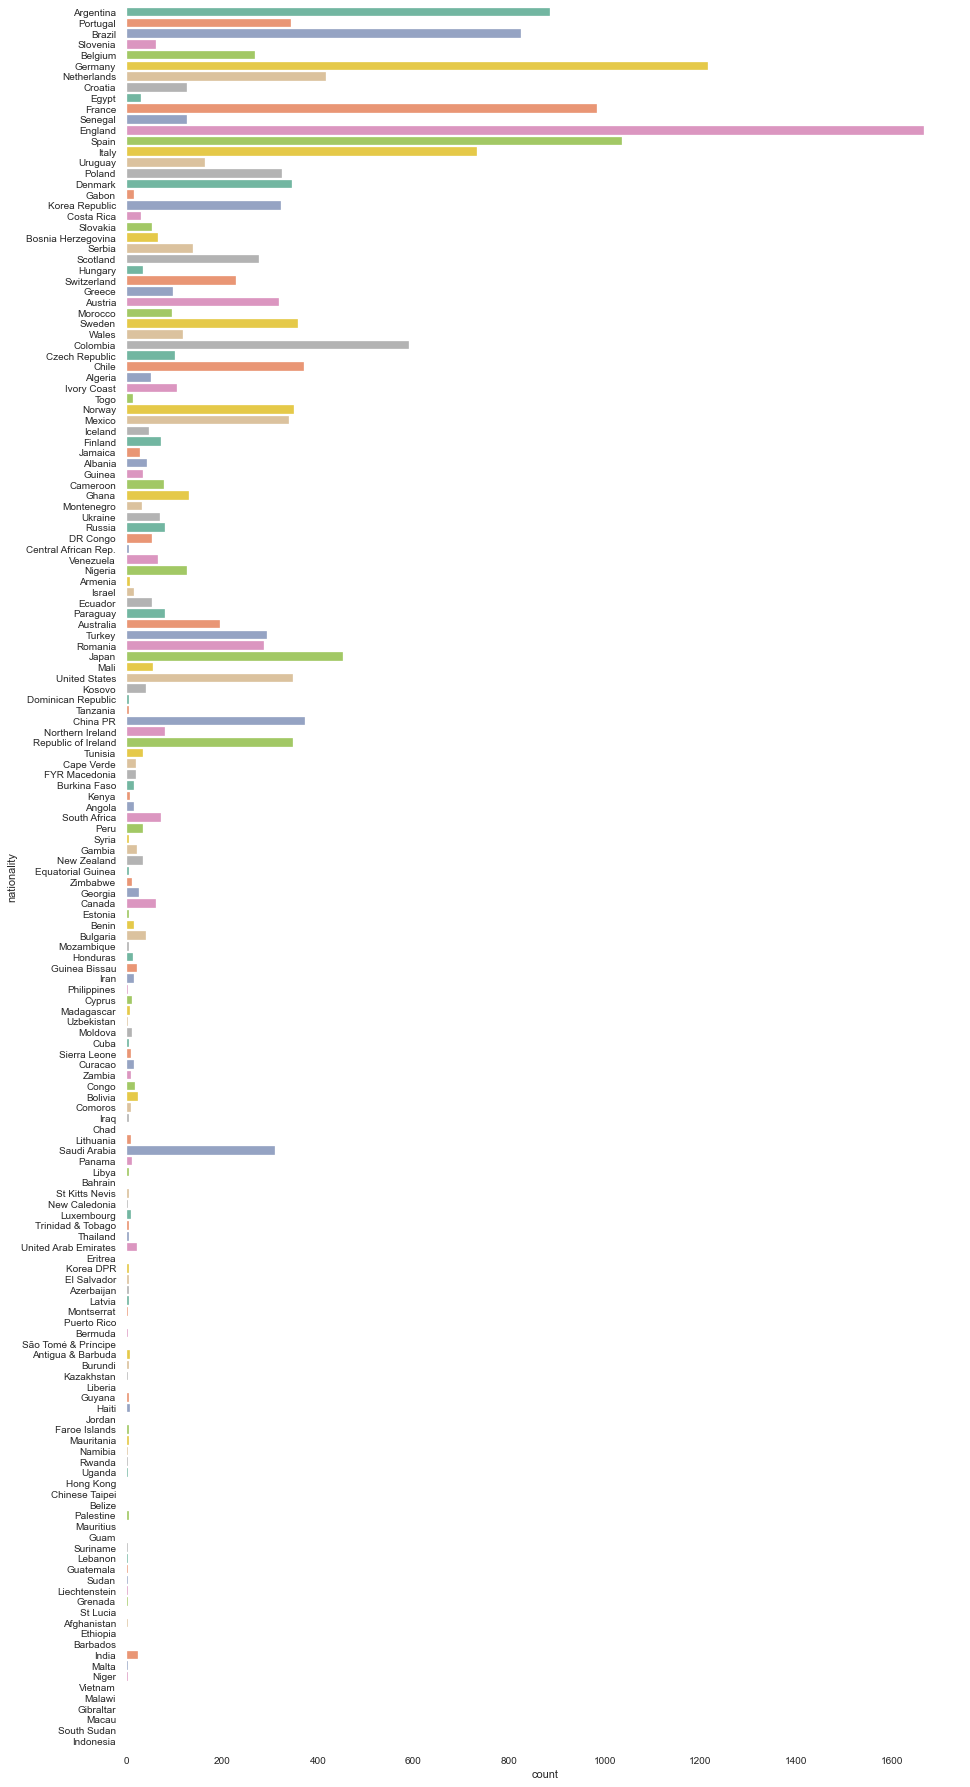

In [13]:
plt.figure(figsize=(15,32))
 
sns.countplot(y = fifa_data.nationality,palette="Set2") #Plot all the nations on Y Axis


Using this graph, we conclude that most of the players are from England, Germany, Spain, Argentina and Brazil. In this case, the graph won’t add a lot of value because we would be picking the best XI, and the results may vary.

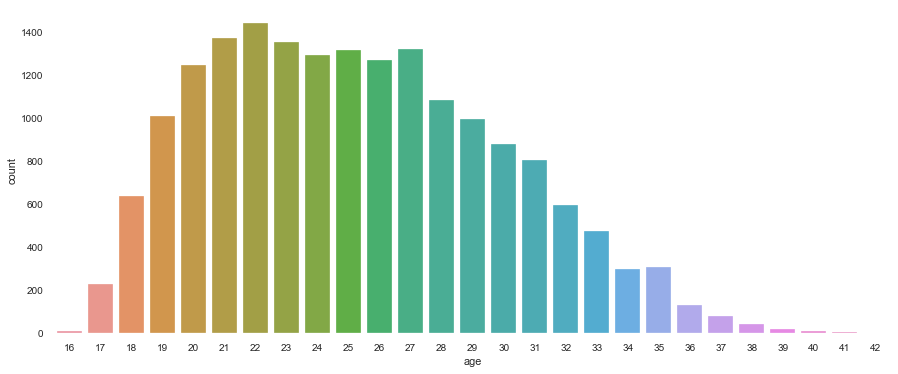

In [14]:
plt.figure(figsize=(15,6))
sns.countplot(x="age",data=fifa_data)

It is evident from the above screenshot that the majority of players are between the age of 19 and 29, with the largest peak of 22 years.

######  World’s Best Playing XI: Finding The Best Goalkeeper

In order to get the best goalkeeper, We’ll be analyzing the data for the below mentioned parameters:



Shot Stopper: A goalkeeper who is strong in stopping shots taken by opponents.

Sweeper: A goalkeeper who is strong in playing with his feet and making passes.

In [71]:
#weights
#a = 0.5
#b = 1
#c= 2
#d = 3
 
#GoalKeeping Characterstics
#fifa_data['gk_Shot_Stopper'] = (b*fifa_data.movement_reactions + b*fifa_data.movement_balance + a*fifa_data.gk_speed + a*fifa_data.power_strength + c*fifa_data.skill_moves + b*fifa_data.gk_positioning + c*fifa_data.gk_diving + d*fifa_data.gk_reflexes + b*fifa_data.gk_handling)/(2*a + 4*b + 2*c + 1*d)
#fifa_data['gk_Sweeper'] = (b*fifa_data.movement_reactions + b*fifa_data.movement_balance + b*fifa_data.gk_speed+ a*fifa_data.dribbling + a*fifa_data.passing + b*fifa_data.skill_moves + b*fifa_data.gk_positioning + b*fifa_data.gk_diving+ d*fifa_data.gk_reflexes + b*fifa_data.gk_handling + d*fifa_data.gk_kicking + c*fifa_data.mentality_vision)/(2*a + 4*b + 3*c + 2*d)


In [15]:
#weights
a = 0.5
b = 1
c= 2
d = 3
 
#GoalKeeping Characterstics:

fifa_data['gk_Shot_Stopper'] = (b*fifa_data.movement_reactions + b*fifa_data.mentality_composure + a*fifa_data.gk_speed + a*fifa_data.power_strength + c*fifa_data.power_jumping + b*fifa_data.gk_positioning + c*fifa_data.gk_diving + d*fifa_data.gk_reflexes+ b*fifa_data.gk_handling)/(2*a + 4*b + 2*c + 1*d)
fifa_data['gk_Sweeper'] = (b*fifa_data.movement_reactions + b*fifa_data.mentality_composure + b*fifa_data.gk_speed + a*fifa_data.attacking_short_passing + a*fifa_data.skill_long_passing + b*fifa_data.power_jumping  + b*fifa_data.gk_positioning + b*fifa_data.gk_diving + d*fifa_data.gk_reflexes + b*fifa_data.gk_handling + d*fifa_data.gk_kicking+ c*fifa_data.mentality_vision)/(2*a + 4*b + 3*c + 2*d)



Text(0, 0.5, 'Shot Stopping Score')

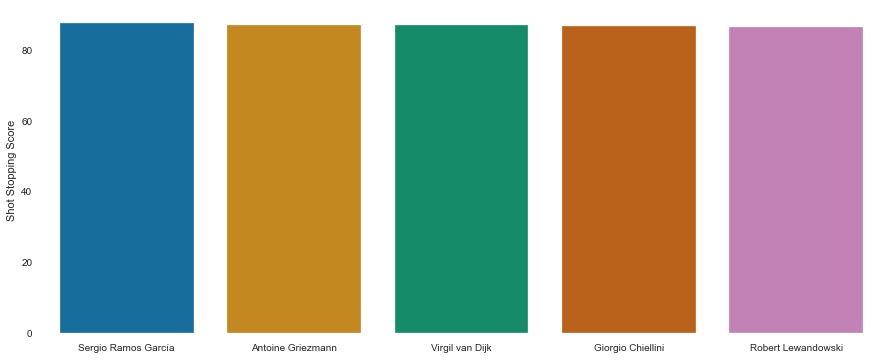

In [16]:
plt.figure(figsize=(15,6))
 
# Generate sequential data and plot
sd = fifa_data.sort_values('gk_Shot_Stopper', ascending=False)[:5]
x1 = np.array(list(sd['long_name']))
y1 = np.array(list(sd['gk_Shot_Stopper']))
sns.barplot(x1, y1, palette= "colorblind")
plt.ylabel("Shot Stopping Score")

Based on the shot-stopper characteristics, it can be inferred that Sergio Ramos Garcia is the best goalkeeper as you can see he tops the above list. 

In [17]:
# Let us now plot the other parameter(Sweeper) as well.

Text(0, 0.5, 'Sweeping Score')

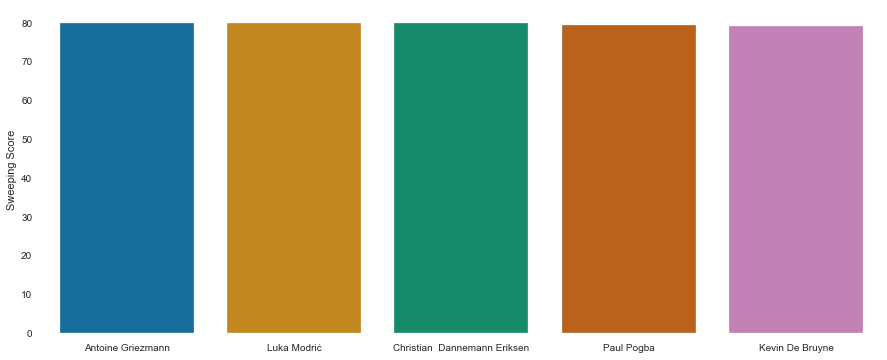

In [18]:
plt.figure(figsize=(15,6))
sd = fifa_data.sort_values('gk_Sweeper', ascending=False)[:5]
x2 = np.array(list(sd['long_name']))
y2 = np.array(list(sd['gk_Sweeper']))
sns.barplot(x2, y2, palette= "colorblind")
plt.ylabel("Sweeping Score")


Antonio Geiezmann tops the chart here. 

###### World’s Best Playing XI: Finding The Best Defenders

In order to find the best defenders, We’ll be using following attributes to fetch the best defenders:
Centre Backs: We need two center-backs. One who plays LCB and the other who plays RCB.
Wing Backs: We again need two wing backs. One who plays on the Left and the other who plays on the right.

In [19]:
# World’s Best Playing XI: Finding The Best Defenders

In [20]:
#weights
a = 0.5
b = 1
c= 2
d = 3
#Choosing Defenders
fifa_data['fifa_data_centre_backs'] = ( d*fifa_data.movement_reactions + c*fifa_data.mentality_interceptions + d*fifa_data.defending_sliding_tackle + d*fifa_data.defending_standing_tackle+ b*fifa_data.mentality_vision+ b*fifa_data.mentality_composure+ b*fifa_data.attacking_crossing +a*fifa_data.attacking_short_passing + b*fifa_data.skill_long_passing+ c*fifa_data.movement_acceleration + b*fifa_data.movement_sprint_speed + d*fifa_data.power_stamina+ d*fifa_data.power_jumping + d*fifa_data.attacking_heading_accuracy + b*fifa_data.power_long_shots + d*fifa_data.defending_marking + c*fifa_data.mentality_aggression)/(6*b + 3*c + 7*d)
#fifa_data['fifa_data_wb_Wing_Backs'] = (b*fifa_data.skill_ball_control + a*fifa_data.dribbling+ a*fifa_data.defending_marking + d*fifa_data.defending_sliding_tackle + d*fifa_data.defending_standing_tackle + a*fifa_data.player_positions + c*fifa_data.mentality_vision + c*fifa_data.attacking_crossing + b*fifa_data.attacking_short_passing + c*fifa_data.skill_long_passing + d*fifa_data.movement_acceleration +d*fifa_data.movement_sprint_speed + c*fifa_data.power_stamina + a*fifa_data.attacking_finishing)/(4*a + 2*b + 4*c + 4*d)


Based on the above parameters, We’ll be predicting 4 best defenders: 2 Centre backs and 2 wing backs. 

In [21]:
# Let us first plot left centre back and right centre back

In [22]:
#LEFT CENTRAL DEFENDER:

Text(0, 0.5, 'LCB Score')

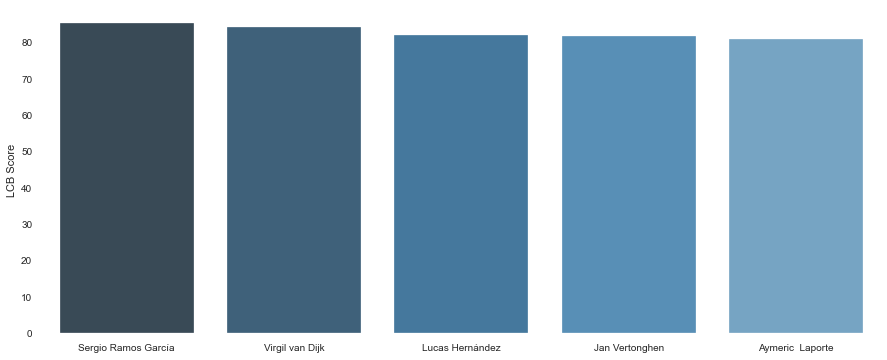

In [23]:
plt.figure(figsize=(15,6))
sd = fifa_data[(fifa_data['team_position'] == 'LCB')].sort_values('fifa_data_centre_backs', ascending=False)[:5]
x2 = np.array(list(sd['long_name']))
y2 = np.array(list(sd['fifa_data_centre_backs']))
sns.barplot(x2, y2, palette=sns.color_palette("Blues_d"))
plt.ylabel("LCB Score")

Based on the left centre back characteristics, it can be inferred that Sergio Ramos Garcia is the Best Left Central Defender-LCB

In [24]:
#RIGHT CENTRAL DEFENDER:

Text(0, 0.5, 'RCB Score')

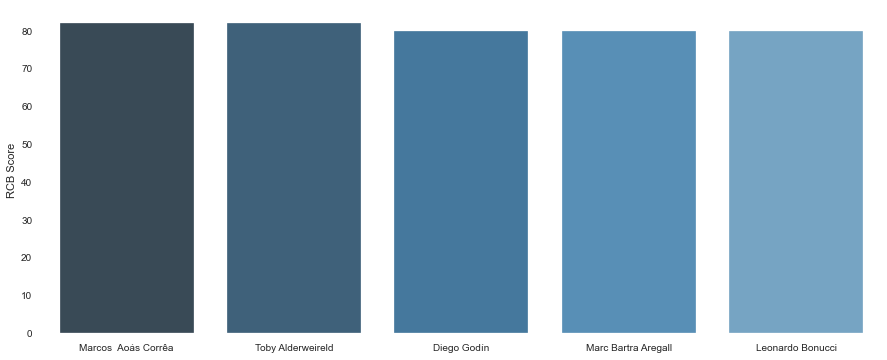

In [25]:
plt.figure(figsize=(15,6))
 
sd = fifa_data[(fifa_data['team_position'] == 'RCB')].sort_values('fifa_data_centre_backs', ascending=False)[:5]
x2 = np.array(list(sd['long_name']))
y2 = np.array(list(sd['fifa_data_centre_backs']))
sns.barplot(x2, y2, palette=sns.color_palette("Blues_d"))
plt.ylabel("RCB Score")

Based on the right centre back characteristics, it can be inferred that Marcos Aoas Correa is the Best Right Central Defender.-RCB

In [26]:
# Next, let us pick the World’s best left wing back/ left back.


In [27]:
#LEFT WING BACK:

In [29]:
# Next, let us now find out who is the best right wing back/ right back.


In [30]:
#RIGHT WING BACK:

In [29]:
plt.figure(figsize=(15,6))
sd = fifa_data[(fifa_data['team_position'] == 'RWB') | (fifa_data['team_position'] == 'RB')].sort_values('fifa_data_wb_Wing_Backs', ascending=False)[:5]
x5 = np.array(list(sd['long_name']))
y5 = np.array(list(sd['fifa_data_wb_Wing_Backs']))
sns.barplot(x5, y5, palette=sns.color_palette("Blues_d"))
plt.ylabel("Right Back Score")


KeyError: 'fifa_data_wb_Wing_Backs'

<Figure size 1080x432 with 0 Axes>

###### World’s Best Playing XI: Finding The Best Mid-Fielders

World’s Best Playing XI: Finding The Best Mid-Fielders
As per our game formation 4-3-3, I have to choose 3 midfielders. In order to find these, We’ll be analyzing the data for the below mentioned parameters:
Playmaker: A playmaker is someone who will move the ball to the attacking 3rd from defence or midfield.
Beast:A beast is a typical box-to-box player with loads of energy and who can boss the midfield.
Controller:A controller is the person who is orchestrating your midfield engine by either sitting back or going forward based on dynamic needs.

In [31]:
#Midfielding Indices
fifa_data['mf_playmaker'] = (d*fifa_data.skill_ball_control + d*fifa_data.dribbling + a*fifa_data.defending_marking + d*fifa_data.movement_reactions + d*fifa_data.mentality_vision + c*fifa_data.attacking_heading_accuracy + c*fifa_data.attacking_crossing + d*fifa_data.attacking_short_passing + c*fifa_data.skill_long_passing + c*fifa_data.skill_curve + b*fifa_data.power_long_shots + c*fifa_data.skill_fk_accuracy)/(1*a + 1*b + 4*c + 4*d)
fifa_data['mf_beast'] = (d*fifa_data.movement_agility + c*fifa_data.movement_balance + b*fifa_data.power_jumping + c*fifa_data.power_strength + d*fifa_data.power_stamina + a*fifa_data.movement_sprint_speed + c*fifa_data.movement_acceleration + d*fifa_data.attacking_short_passing + c*fifa_data.mentality_aggression + d*fifa_data.movement_reactions + b*fifa_data.defending_marking + b*fifa_data.defending_standing_tackle + b*fifa_data.defending_sliding_tackle+ b*fifa_data.mentality_interceptions)/(1*a + 5*b + 4*c + 4*d)
fifa_data['mf_controller'] = (b*fifa_data.weak_foot + d*fifa_data.skill_ball_control + a*fifa_data.dribbling + a*fifa_data.defending_marking + a*fifa_data.movement_reactions+ c*fifa_data.mentality_vision + c*fifa_data.mentality_composure + d*fifa_data.attacking_short_passing + d*fifa_data.skill_long_passing)/(2*c + 3*d + 4*a)


In [32]:
# PLAYMAKER:

Text(0, 0.5, 'PlayMaker Score')

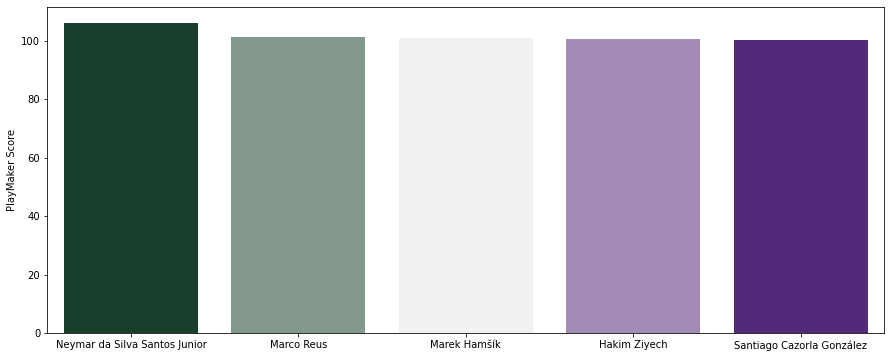

In [33]:
plt.figure(figsize=(15,6))
 
ss = fifa_data[(fifa_data['team_position'] == 'CAM') | (fifa_data['team_position'] == 'LAM') | (fifa_data['team_position'] == 'RAM')].sort_values('mf_playmaker', ascending=False)[:5]
x3 = np.array(list(ss['long_name']))
y3 = np.array(list(ss['mf_playmaker']))
sns.barplot(x3, y3, palette=sns.diverging_palette(145, 280, s=85, l=25, n=5))
plt.ylabel("PlayMaker Score")

As per the above analysis, Neymar da Silva Santos Junior is the best Playmaker for FIFA 2020.

In [34]:
# let me pick the World’s best Beast or Centre midfielder.
# Beast:

Text(0, 0.5, 'Beast Score')

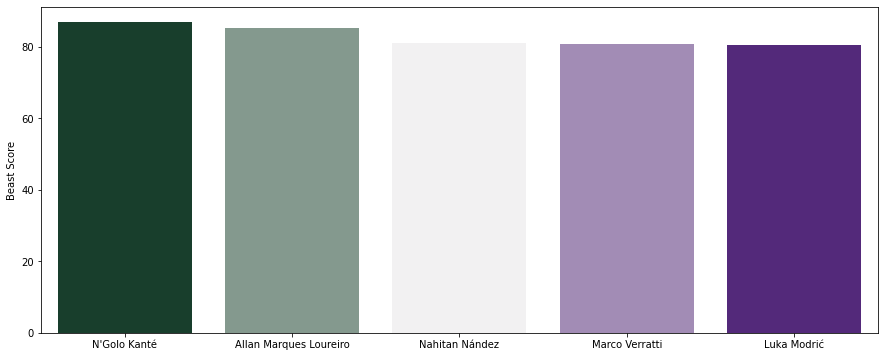

In [35]:
plt.figure(figsize=(15,6))
 
ss = fifa_data[(fifa_data['team_position'] == 'RCM') | (fifa_data['team_position'] == 'RM')].sort_values('mf_beast', ascending=False)[:5]
x2 = np.array(list(ss['long_name']))
y2 = np.array(list(ss['mf_beast']))
sns.barplot(x2, y2, palette=sns.diverging_palette(145, 280, s=85, l=25, n=5))
plt.ylabel("Beast Score")

As per the above analysis,  N’ Golo Kante is the best Beast/ Right Central Midfielder.

In [36]:
# let us pick the World’s best controller.
# Controller:

Text(0, 0.5, 'Controller Score')

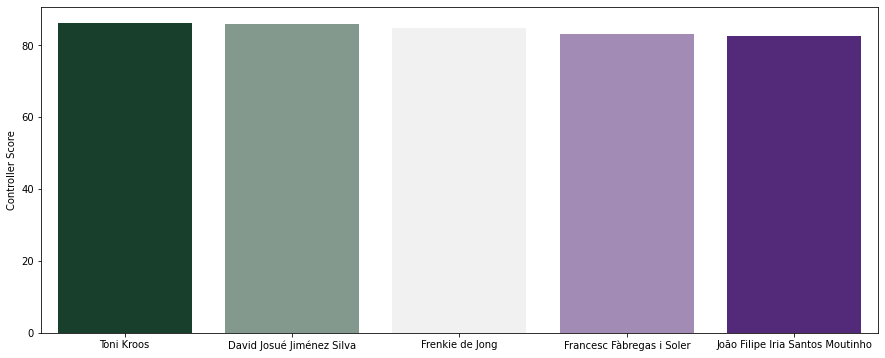

In [37]:
plt.figure(figsize=(15,6))
 
# Generate some sequential data
ss = fifa_data[(fifa_data['team_position'] == 'LCM') | (fifa_data['team_position'] == 'LM')].sort_values('mf_controller', ascending=False)[:5]
x1 = np.array(list(ss['long_name']))
y1 = np.array(list(ss['mf_controller']))
sns.barplot(x1, y1, palette=sns.diverging_palette(145, 280, s=85, l=25, n=5))
plt.ylabel("Controller Score")

As per the above analysis, Toni Kroos is the best controller/ Left Central Midfielder.

In [ ]:
# Having said that, below is the list of the best mid-fielders for this World Cup 2018:

In [ ]:
############################

In [ ]:
# Moving ahead with the World’s Best Playing XI, it’s time we choose attackers

###### Let us plot all of them and find the best attackers in the world for our best XI.

 ###### World’s Best Playing XI: Finding The Best Attackers

In order to find the best attacker, We’ll be analyzing the below mentioned parameters: 

 Attacking Left Wing: He is a player, attacking from the left flank.

Attacking Right Wing: He is a player, attacking from the right flank.

Striker: He is a player attacking from the center.

In [40]:

fifa_data['att_left_wing'] = (c*fifa_data.weak_foot + c*fifa_data.skill_ball_control+ c*fifa_data.dribbling + c*fifa_data.movement_sprint_speed + d*fifa_data.movement_acceleration + b*fifa_data.mentality_vision + c*fifa_data.attacking_crossing + b*fifa_data.attacking_short_passing + b*fifa_data.skill_long_passing + b*fifa_data.mentality_aggression + b*fifa_data.movement_agility + a*fifa_data.skill_curve+ c*fifa_data.power_long_shots + b*fifa_data.skill_fk_accuracy+ d*fifa_data.attacking_finishing)/(a + 6*b + 6*c + 2*d)
fifa_data['att_right_wing'] = (c*fifa_data.weak_foot + c*fifa_data.skill_ball_control + c*fifa_data.dribbling + c*fifa_data.movement_sprint_speed + d*fifa_data.movement_acceleration + b*fifa_data.mentality_vision + c*fifa_data.attacking_crossing + b*fifa_data.attacking_short_passing + b*fifa_data.skill_long_passing+ b*fifa_data.mentality_aggression+ b*fifa_data.movement_agility + a*fifa_data.skill_curve + c*fifa_data.power_long_shots + b*fifa_data.skill_fk_accuracy + d*fifa_data.attacking_finishing)/(a + 6*b + 6*c + 2*d)
fifa_data['att_striker'] = (b*fifa_data.weak_foot + b*fifa_data.skill_ball_control + a*fifa_data.mentality_vision + b*fifa_data.mentality_aggression + b*fifa_data.movement_agility + a*fifa_data.skill_curve + a*fifa_data.power_long_shots + d*fifa_data.movement_balance + d*fifa_data.attacking_finishing + d*fifa_data.attacking_heading_accuracy + c*fifa_data.power_jumping + c*fifa_data.dribbling)/(3*a + 4*b + 2*c + 3*d)


In [ ]:
#  let us plot the left wing attacker.

Text(0, 0.5, 'Left Wing')

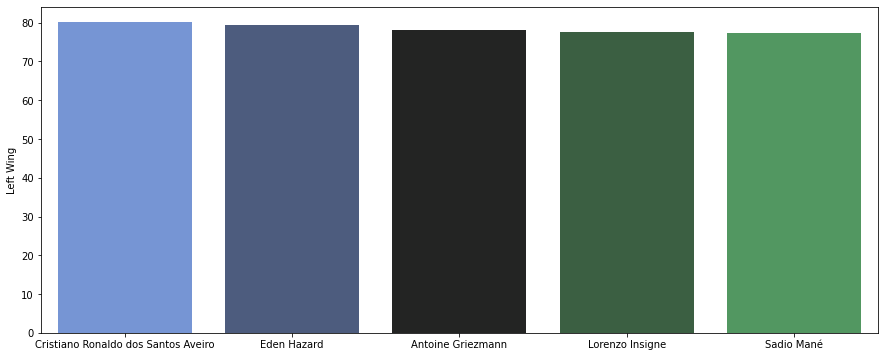

In [42]:
plt.figure(figsize=(15,6))
 
ss = fifa_data[(fifa_data['team_position'] == 'LW') | (fifa_data['team_position'] == 'LM') | (fifa_data['team_position'] == 'LS')].sort_values('att_left_wing', ascending=False)[:5]
x1 = np.array(list(ss['long_name']))
y1 = np.array(list(ss['att_left_wing']))
sns.barplot(x1, y1, palette=sns.diverging_palette(255, 133, l=60, n=5, center="dark"))
plt.ylabel("Left Wing")

It’s quite evident from the above plot that  Cristiano Ronaldo dos Santos Aveiro is the best Left Wing Attacker for FIFA 2020.

In [43]:
#  let us plot the right wing attacker.

Text(0, 0.5, 'Right Wing')

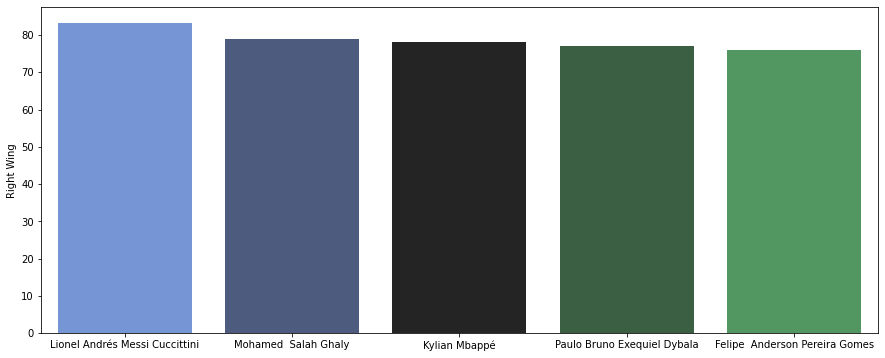

In [44]:
plt.figure(figsize=(15,6))
 
ss = fifa_data[(fifa_data['team_position'] == 'RW') | (fifa_data['team_position'] == 'RM') | (fifa_data['team_position'] == 'RS')].sort_values('att_right_wing', ascending=False)[:5]
x2 = np.array(list(ss['long_name']))
y2 = np.array(list(ss['att_right_wing']))
sns.barplot(x2, y2, palette=sns.diverging_palette(255, 133, l=60, n=5, center="dark"))
plt.ylabel("Right Wing")

As per the above analysis,  Lionel Andres Messi Cuccittini as the right wing attacker for FIFA 2020.

In [ ]:
###### World’s Best Playing XI, it’s time we choose our striker.
# STRIKER:

Text(0, 0.5, 'Striker')

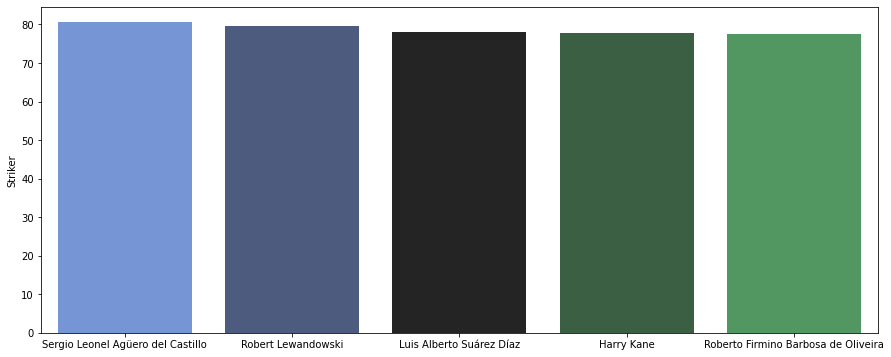

In [46]:
plt.figure(figsize=(15,6))
ss = fifa_data[(fifa_data['team_position'] == 'ST') | (fifa_data['team_position'] == 'LS') | (fifa_data['team_position'] == 'RS') | (fifa_data['team_position'] == 'CF')].sort_values('att_striker', ascending=False)[:5]
x3 = np.array(list(ss['long_name']))
y3 = np.array(list(ss['att_striker']))
sns.barplot(x3, y3, palette=sns.diverging_palette(255, 133, l=60, n=5, center="dark"))
plt.ylabel("Striker")

As per the above analysis, the best striker for World Cup 2018 would be Sergio Leonel Aguero del Castillo.


In [ ]:
#Having said that, below is the list of the best attackers in the world:

In [ ]:
#########################

In [ ]:
#To conclude our analysis, the below  represents the World’s Best Playing XI for the World Cup 2018 in the 4-3-3 lineup.

## EDA

###### Getting overview of the Dataset

In [177]:
print("Shape :",fifa_data.shape)
print("Rows : ",fifa_data.shape[0])
print("Columns : ",fifa_data.shape[1])
print("\nFeatures : \n" ,fifa_data.columns.tolist())
print("\n Missing Values : ",fifa_data.isnull().sum().values.sum())
print("\nUnique Values : \n" ,fifa_data.nunique(dropna=False))

Shape : (18278, 107)
Rows :  18278
Columns :  107

Features : 
 ['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob', 'height_cm', 'weight_kg', 'nationality', 'club', 'overall', 'potential', 'value_eur', 'wage_eur', 'player_positions', 'preferred_foot', 'international_reputation', 'weak_foot', 'skill_moves', 'work_rate', 'body_type', 'real_face', 'release_clause_eur', 'player_tags', 'team_position', 'team_jersey_number', 'loaned_from', 'joined', 'contract_valid_until', 'nation_position', 'nation_jersey_number', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed', 'gk_positioning', 'player_traits', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'move

In [178]:
#For Fifa data you need to use clustering algorithms to categorize similar players using their traits and their different skills in the field.

In [179]:
fifa_data.describe

<bound method NDFrame.describe of        sofifa_id                                         player_url  \
0         158023  https://sofifa.com/player/158023/lionel-messi/...   
1          20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
2         190871  https://sofifa.com/player/190871/neymar-da-sil...   
3         200389  https://sofifa.com/player/200389/jan-oblak/20/...   
4         183277  https://sofifa.com/player/183277/eden-hazard/2...   
...          ...                                                ...   
18273     245006  https://sofifa.com/player/245006/shuai-shao/20...   
18274     250995  https://sofifa.com/player/250995/mingjie-xiao/...   
18275     252332  https://sofifa.com/player/252332/wei-zhang/20/...   
18276     251110  https://sofifa.com/player/251110/haijian-wang/...   
18277     233449  https://sofifa.com/player/233449/ximing-pan/20...   

              short_name                            long_name  age  \
0               L. Messi       Lionel André

In [180]:
fifa_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Columns: 107 entries, sofifa_id to fifa_data_centre_backs
dtypes: float64(19), int32(26), int64(45), object(17)
memory usage: 13.1+ MB


In [181]:
fifa_data.dtypes

sofifa_id                   int64
player_url                 object
short_name                 object
long_name                  object
age                         int64
                           ...   
rcb                         int32
rb                          int32
gk_Shot_Stopper           float64
gk_Sweeper                float64
fifa_data_centre_backs    float64
Length: 107, dtype: object

###### Grouping the Data into Categorical and Continuous Variable

In [182]:
Categorical_data = fifa_data.select_dtypes(include = "object").columns
Categorical_data

Index(['player_url', 'short_name', 'long_name', 'dob', 'nationality', 'club',
       'player_positions', 'preferred_foot', 'work_rate', 'body_type',
       'real_face', 'player_tags', 'team_position', 'loaned_from', 'joined',
       'nation_position', 'player_traits'],
      dtype='object')

In [183]:
Numeric_data = fifa_data.select_dtypes(exclude = "object").columns
Numeric_data

Index(['sofifa_id', 'age', 'height_cm', 'weight_kg', 'overall', 'potential',
       'value_eur', 'wage_eur', 'international_reputation', 'weak_foot',
       'skill_moves', 'release_clause_eur', 'team_jersey_number',
       'contract_valid_until', 'nation_jersey_number', 'pace', 'shooting',
       'passing', 'dribbling', 'defending', 'physic', 'gk_diving',
       'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed',
       'gk_positioning', 'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positionin

In [184]:
#Grouping the Data into Categorical and Continuous Variable
Catvar_list=['player_url', 'short_name', 'long_name', 'dob', 'nationality', 'club',
       'player_positions', 'preferred_foot', 'work_rate', 'body_type',
       'real_face', 'player_tags', 'team_position', 'loaned_from', 'joined',
       'nation_position', 'player_traits', 'ls', 'st', 'rs', 'lw', 'lf', 'cf',
       'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb',
       'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb']

Convar_list=['sofifa_id', 'age', 'height_cm', 'weight_kg', 'overall', 'potential',
       'value_eur', 'wage_eur', 'international_reputation', 'weak_foot',
       'skill_moves', 'release_clause_eur', 'team_jersey_number',
       'contract_valid_until', 'nation_jersey_number', 'pace', 'shooting',
       'passing', 'dribbling', 'defending', 'physic', 'gk_diving',
       'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed',
       'gk_positioning', 'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking', 'defending_standing_tackle',
       'defending_sliding_tackle', 'goalkeeping_diving',
       'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes']


In [185]:
for c in Catvar_list:
    val=Counter(fifa_data[c])
    print("Column '%s' value_counts : " %(c) , Counter(fifa_data[c]))
    print("==================================================")

Column 'player_url' value_counts :  Counter({'https://sofifa.com/player/158023/lionel-messi/20/159586': 1, 'https://sofifa.com/player/20801/c-ronaldo-dos-santos-aveiro/20/159586': 1, 'https://sofifa.com/player/190871/neymar-da-silva-santos-jr/20/159586': 1, 'https://sofifa.com/player/200389/jan-oblak/20/159586': 1, 'https://sofifa.com/player/183277/eden-hazard/20/159586': 1, 'https://sofifa.com/player/192985/kevin-de-bruyne/20/159586': 1, 'https://sofifa.com/player/192448/marc-andre-ter-stegen/20/159586': 1, 'https://sofifa.com/player/203376/virgil-van-dijk/20/159586': 1, 'https://sofifa.com/player/177003/luka-modric/20/159586': 1, 'https://sofifa.com/player/209331/mohamed-salah/20/159586': 1, 'https://sofifa.com/player/231747/kylian-mbappe/20/159586': 1, 'https://sofifa.com/player/201024/kalidou-koulibaly/20/159586': 1, 'https://sofifa.com/player/202126/harry-kane/20/159586': 1, 'https://sofifa.com/player/212831/alisson-ramses-becker/20/159586': 1, 'https://sofifa.com/player/193080/da

In [186]:
print('\nUnique values of fifa_data.player_url:: \n',fifa_data.player_url.value_counts(dropna = False))
print('\nUnique values of fifa_data.short_name:: \n',fifa_data.short_name.value_counts(dropna = False))
print('\nUnique values of fifa_data.long_name:: \n',fifa_data.long_name.value_counts(dropna = False))
print('\nUnique values of fifa_data.dob:: \n',fifa_data.dob.value_counts(dropna = False))
print('\nUnique values of fifa_data.nationality:: \n',fifa_data.nationality.value_counts(dropna = False))
print('\nUnique values of fifa_data.club:: \n',fifa_data.club.value_counts(dropna = False))
print('\nUnique values of fifa_data.player_positions:: \n',fifa_data.player_positions.value_counts(dropna = False))
print('\nUnique values of fifa_data.preferred_foot:: \n',fifa_data.preferred_foot.value_counts(dropna = False))
print('\nUnique values of fifa_data.work_rate:: \n',fifa_data.work_rate.value_counts(dropna = False))
print('\nUnique values of fifa_data.body_type :: \n',fifa_data.body_type.value_counts(dropna = False))
print('\nUnique values of fifa_data.real_face :: \n',fifa_data.real_face.value_counts(dropna = False))
print('\nUnique values of fifa_data.player_tags :: \n',fifa_data.player_tags.value_counts(dropna = False))
print('\nUnique values of fifa_data.team_position:: \n',fifa_data.team_position.value_counts(dropna = False))
print('\nUnique values of fifa_data.loaned_from:: \n',fifa_data.loaned_from.value_counts(dropna = False))
print('\nUnique values of fifa_data.joined :: \n',fifa_data.joined.value_counts(dropna = False))
print('\nUnique values of fifa_data.nation_position:: \n',fifa_data.nation_position.value_counts(dropna = False))
print('\nUnique values of fifa_data.player_traits:: \n',fifa_data.player_traits.value_counts(dropna = False))
print('\nUnique values of fifa_data.ls:: \n',fifa_data.ls.value_counts(dropna = False))
print('\nUnique values of fifa_data.st:: \n',fifa_data.st.value_counts(dropna = False))
print('\nUnique values of fifa_data.rs:: \n',fifa_data.rs.value_counts(dropna = False))
print('\nUnique values of fifa_data.lw:: \n',fifa_data.lw.value_counts(dropna = False))
print('\nUnique values of fifa_data.lf:: \n',fifa_data.lf.value_counts(dropna = False))
print('\nUnique values of fifa_data.cf :: \n',fifa_data.cf.value_counts(dropna = False))
print('\nUnique values of fifa_data.rf :: \n',fifa_data.rf.value_counts(dropna = False))
print('\nUnique values of fifa_data.rw  :: \n',fifa_data.rw .value_counts(dropna = False))
print('\nUnique values of fifa_data.lam  :: \n',fifa_data.lam.value_counts(dropna = False))
print('\nUnique values of fifa_data.cam  :: \n',fifa_data.cam.value_counts(dropna = False))
print('\nUnique values of fifa_data.ram  :: \n',fifa_data.ram .value_counts(dropna = False))
print('\nUnique values of fifa_data.lm  :: \n',fifa_data.lm.value_counts(dropna = False))
print('\nUnique values of fifa_data.lcm   :: \n',fifa_data.lcm.value_counts(dropna = False))
print('\nUnique values of fifa_data.cm   :: \n',fifa_data.cm .value_counts(dropna = False))
print('\nUnique values of fifa_data.rcm:: \n',fifa_data.rcm.value_counts(dropna = False))
print('\nUnique values of fifa_data.rm:: \n',fifa_data.rm.value_counts(dropna = False))
print('\nUnique values of fifa_data.lwb:: \n',fifa_data.lwb .value_counts(dropna = False))
print('\nUnique values of fifa_data.ldm :: \n',fifa_data.ldm  .value_counts(dropna = False))
print('\nUnique values of fifa_data.cdm  :: \n',vaccine_data.h1n1_vaccine  .value_counts(dropna = False))
print('\nUnique values of fifa_data.rdm  :: \n',fifa_data.rdm .value_counts(dropna = False))
print('\nUnique values of fifa_data.rwb  :: \n',fifa_data.rwb .value_counts(dropna = False))
print('\nUnique values of fifa_data.lb  :: \n',fifa_data.lb.value_counts(dropna = False))

print('\nUnique values of fifa_data.lcb  :: \n',fifa_data.lcb.value_counts(dropna = False))
print('\nUnique values of fifa_data.cb  :: \n',fifa_data.cb.value_counts(dropna = False))
print('\nUnique values of fifa_data.rcb  :: \n',fifa_data.rcb.value_counts(dropna = False))
print('\nUnique values of fifa_data.rb  :: \n',fifa_data.rb.value_counts(dropna = False))


Unique values of fifa_data.player_url:: 
 https://sofifa.com/player/198156/leandro-marin/20/159586                 1
https://sofifa.com/player/238858/bruno-vinicius-souza-ramos/20/159586    1
https://sofifa.com/player/206004/juhani-ojala/20/159586                  1
https://sofifa.com/player/245994/anthony-gomez-mancini/20/159586         1
https://sofifa.com/player/250938/sascha-eichmeier/20/159586              1
                                                                        ..
https://sofifa.com/player/183498/marco-parolo/20/159586                  1
https://sofifa.com/player/223921/dimitrios-kolovos/20/159586             1
https://sofifa.com/player/189952/korcan-celikay/20/159586                1
https://sofifa.com/player/199142/kamer-qaka/20/159586                    1
https://sofifa.com/player/237994/nahuel-barrios/20/159586                1
Name: player_url, Length: 18278, dtype: int64

Unique values of fifa_data.short_name:: 
 J. Rodríguez     11
Paulinho          9
J. 

NameError: name 'vaccine_data' is not defined

###### Checking for Correlation

In [187]:
cormat=fifa_data.corr()
#print(cor_mat)
plt.figure(figsize= (12,15))
#. heatmap(cor_mat, annot=True)
cormat.style.background_gradient(cmap='coolwarm').set_precision(2)

<Figure size 864x1080 with 0 Axes>

###### Profiling the dataset

In [188]:
#prof = ProfileReport(fifa_data)
#prof.to_file(output_file='output.html')

In [189]:
#ProfileReport(fifa_data)

###### Data Imputation

<AxesSubplot:>

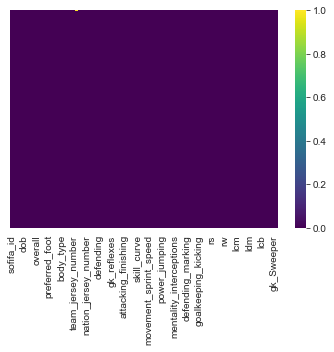

In [190]:
sns.set_style('whitegrid')
sns.heatmap(fifa_data.isnull(),yticklabels=False,cbar=True,cmap='viridis')

###### Encoding Categorical Variables

In [191]:
labelencoder = LabelEncoder()

In [192]:
fifa_data_enc = fifa_data

In [193]:
objList = fifa_data_enc.select_dtypes(include = "object").columns
objList

Index(['player_url', 'short_name', 'long_name', 'dob', 'nationality', 'club',
       'player_positions', 'preferred_foot', 'work_rate', 'body_type',
       'real_face', 'player_tags', 'team_position', 'loaned_from', 'joined',
       'nation_position', 'player_traits'],
      dtype='object')

In [194]:
Feature_Code_Value = pd.DataFrame(columns=['Feature_Type', 'Feature_Value', 'Feature_Value_Enc', 'Feature_Value_Cnt'])

In [195]:
for feat in objList:
    feat_col_name = feat+'_enc'
    fifa_data_enc[feat_col_name] = labelencoder.fit_transform(fifa_data_enc[feat].astype(str))
    feat_temp_val = fifa_data_enc.groupby([feat, feat_col_name]).size().reset_index().rename(columns={0:'Feature_Value_Cnt'})
    feat_temp_val['Feature_Type'] = feat
    #feat_temp_val[['Feature_Type', feat, feat_col_name, 'Feature_Value_Cnt']]
    Feature_Code_Value = Feature_Code_Value[['Feature_Type', 'Feature_Value', 'Feature_Value_Enc', 'Feature_Value_Cnt']].append(feat_temp_val[['Feature_Type', feat, feat_col_name, 'Feature_Value_Cnt']])
    Feature_Code_Value.Feature_Value.fillna(Feature_Code_Value[feat], inplace=True)
    Feature_Code_Value.Feature_Value_Enc.fillna(Feature_Code_Value[feat_col_name], inplace=True)
    Feature_Code_Value.drop(columns=[feat, feat_col_name], axis=1, inplace=True)
    del feat_temp_val
    fifa_data_enc.drop(columns=[feat], axis=1, inplace=True)
    
Feature_Code_Value.reset_index(drop=True, inplace=True)
Feature_Code_Value['Feature_Value_Enc'] = Feature_Code_Value['Feature_Value_Enc'].astype(int)

In [31]:
Feature_Code_Value

NameError: name 'Feature_Code_Value' is not defined

In [197]:
fifa_data_enc

sofifa_id  age  height_cm  weight_kg  overall  potential  value_eur  \
0         158023   32        170         72       94         94   95500000   
1          20801   34        187         83       93         93   58500000   
2         190871   27        175         68       92         92  105500000   
3         200389   26        188         87       91         93   77500000   
4         183277   28        175         74       91         91   90000000   
...          ...  ...        ...        ...      ...        ...        ...   
18273     245006   22        186         79       48         56      40000   
18274     250995   22        177         66       48         56      40000   
18275     252332   19        186         75       48         56      40000   
18276     251110   18        185         74       48         54      40000   
18277     233449   26        182         78       48         51      40000   

       wage_eur  international_reputation  weak_foot  ...  preferred_foot_enc  \
0        565000                         5          4  ...                   0   
1        405000                         5          4  ...                   1   
2        290000                         5          5  ...                   1   
3        125000                         3          3  ...                   1   
4        470000                         4          4  ...                   1   
...         ...                       ...        ...  ...                 ...   
18273      2000                         1          3  ...                   1   
18274      2000                         1          2  ...                   1   
18275      1000                         1          2  ...                   1   
18276      1000                         1          2  ...                   1   
18277      2000                         1          3  ...                   1   

       work_rate_enc  body_type_enc  real_face_enc  player_tags_enc  \
0                  7              4              1               25   
1                  1              1              1               72   
2                  2              5              1               73   
3                  8              6              1               73   
4                  2              6              1               70   
...              ...            ...            ...              ...   
18273              6              6              0                0   
18274              8              6              0                0   
18275              5              3              0                0   
18276              4              3              0                0   
18277              8              6              0                0   

       team_position_enc  loaned_from_enc  joined_enc  nation_position_enc  \
0                     25              315          11                   26   
1                     14              315        1399                   12   
2                      0              315        1119                   13   
3                      5              315         402                    5   
4                     14              315        1711                   10   
...                  ...              ...         ...                  ...   
18273                 21               12        1402                   25   
18274                 28               12        1581                   25   
18275                 28               12        1550                   25   
18276                 28               12        1581                   25   
18277                 28              282        1581                   25   

       player_traits_enc  
0                    110  
1                    685  
2                    785  
3                    332  
4                    163  
...                  ...  
18273                 27  
18274                 27  
18275                 27  
18276                 27  
18277     